## Project Name:-Credit card Fraud Detection

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']= 14,8
RANDOM_SEED = 42
LABELS= ["Normal","Fraud"]



In [2]:
data = pd.read_csv(r'C:\Users\AK\Desktop\file\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory data analysis

In [4]:
data.isnull().values.any()

False

C:\Users\AK\AppData\Local\Temp\ipykernel_11960\34062652.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'],sort=True)


Text(0, 0.5, 'Frequency')

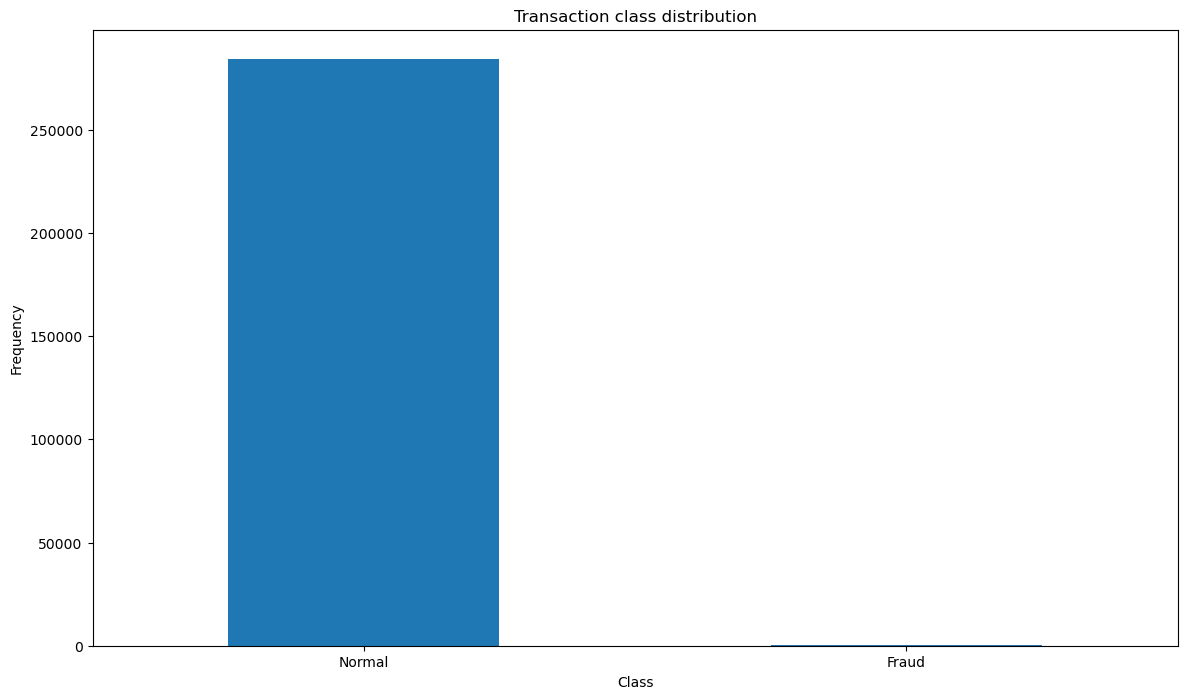

In [5]:
count_classes = pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Transaction class distribution')
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
## Get the fraud and normal dataset
fraud = data[data['Class']==1]

normal= data[data['Class']==0]

In [7]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

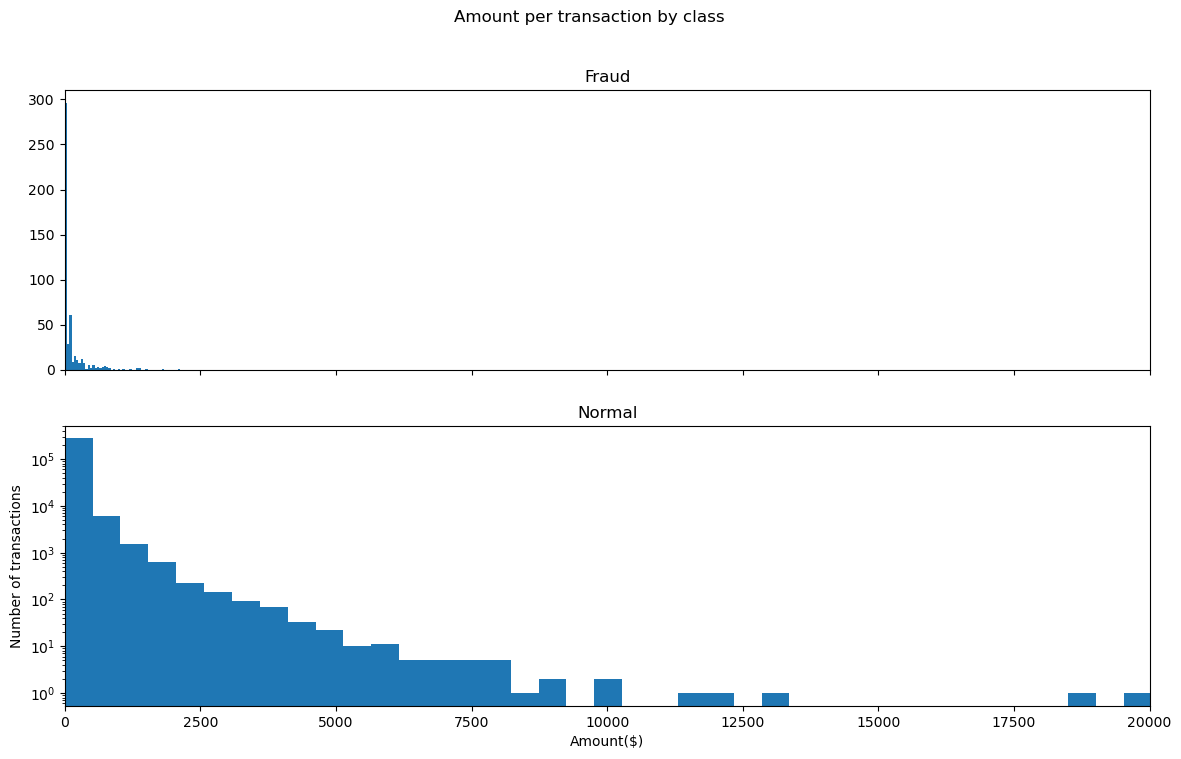

In [11]:
f,(aX1,aX2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins=50
aX1.hist(fraud.Amount,bins=bins)
aX1.set_title('Fraud')
aX2.hist(normal.Amount,bins=bins)
aX2.set_title('Normal')
plt.xlabel('Amount($)')
plt.ylabel('Number of transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show()



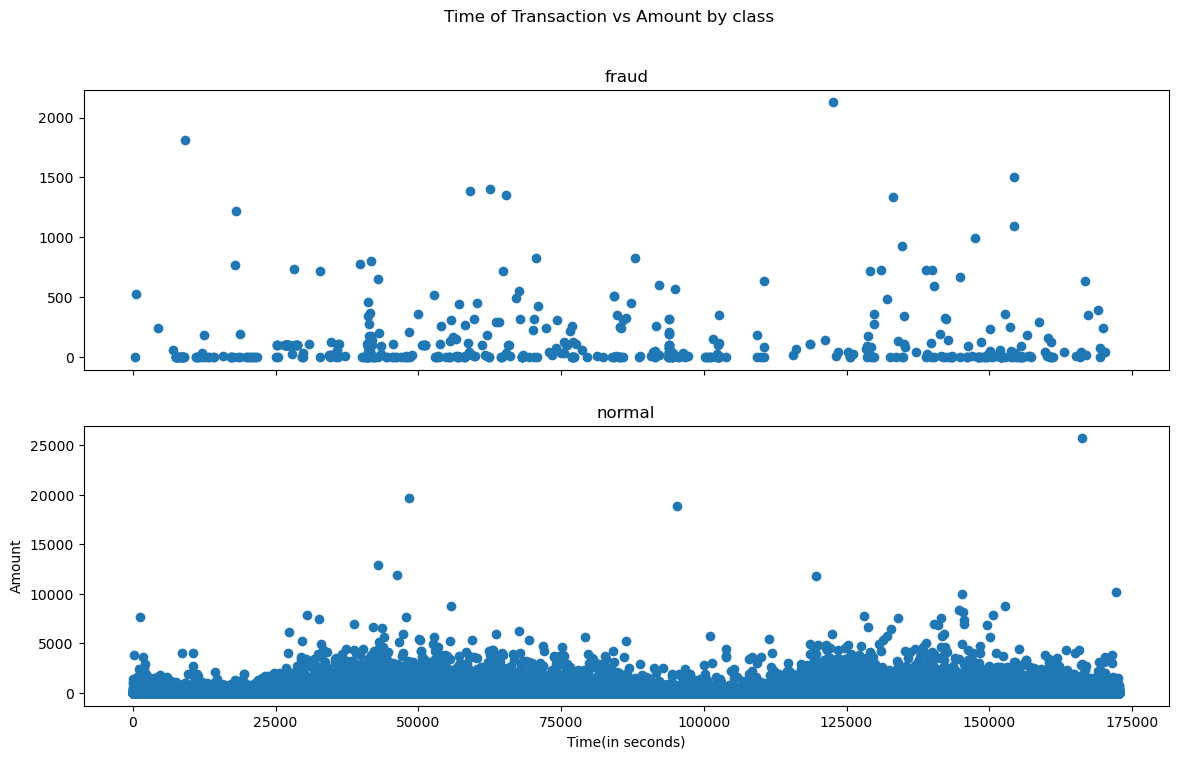

In [19]:
f,(aX1,aX2) = plt.subplots(2,1,sharex=True)
f.suptitle('Time of Transaction vs Amount by class')
aX1.scatter(fraud.Time,fraud.Amount)
aX1.set_title('fraud')
aX2.scatter(normal.Time,normal.Amount)
aX2.set_title('normal')
plt.xlabel('Time(in seconds)')
plt.ylabel('Amount')
plt.show()


In [12]:
## Take some samples of the data
data1= data.sample(frac=0.1,random_state=1)
data1.shape

(28481, 31)

In [13]:
data.shape

(284807, 31)

In [14]:
## Determine the number of fraud and valid transaction in the dataset

fraud = data1[data1['Class']==1]
valid = data1[data1['Class']==0]
outlier_fraction= len(fraud)/float(len(valid))

In [15]:
print(outlier_fraction)

print("fraud cases:{}".format(len(fraud)))
print("valid cases:{}".format(len(valid)))

0.0017234102419808666
fraud cases:49
valid cases:28432


In [19]:
## create independent and dependent features
columns = data1.columns.tolist()
# filter the columns
columns=[c for c in columns if c not in['Class']]
# save the variable we are predicting
target='Class'
# define a random state
state=np.random.RandomState(42)
X=data1[columns]
Y=data1[target]
X_outliers=state.uniform(low=0, high=1, size=(X.shape[0] , X.shape[1]))
print(X.shape)
print(Y.shape)



(28481, 30)
(28481,)


## Model Predictions

In [20]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Define the outlier detection method
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, contamination=outlier_fraction, novelty=True),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                          max_iter=-1)  # max_iter=-1 means no limit
}


In [21]:
type(classifiers)

dict

In [22]:
outliers = len(fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag the outliers
    if clf_name == "Local Outlier Factor":
        clf.fit(X)
        y_pred = clf.predict(X)
        scores_prediction = clf.decision_function(X)
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        if hasattr(clf, "decision_function"):
            scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values
    y_pred[y_pred == 1] = 0  # Inliers
    y_pred[y_pred == -1] = 1  # Outliers

    # Calculate the number of errors
    n_errors = (y_pred != Y).sum()

    # Print the results
    print("{}: {}".format(clf_name, n_errors))
    print('Accuracy score:')
    print(accuracy_score(Y, y_pred))
    print('Classification report:')
    print(classification_report(Y, y_pred))


Isolation Forest: 73
Accuracy score:
0.9974368877497279
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481



D:\Users\AK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
D:\Users\AK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Local Outlier Factor: 83
Accuracy score:
0.9970857764825674
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.03      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8515
Accuracy score:
0.7010287560127805
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     28432
           1       0.00      0.37      0.00        49

    accuracy                           0.70     28481
   macro avg       0.50      0.53      0.41     28481
weighted avg       1.00      0.70      0.82     28481



## Observations

1.Isolation forest detected 75 errors versus local outlier factor detecting 83 errors versus SVM detecting 8515 errors.

2.Isolation forest has a 99.73% more accurate than LOF  99.70% and SVM of 70%.

3.When comparing error precision & recal for 3 models,the isolation forest performed much better than the LOF as we can see that the detection of fraud cases is around 27% versus LOF detection rate of just 2% and SVM of 0%.
So overall isolation forest method performed much better in dtermining the fraud cases which is around 30%.
    
4.We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex detection models to get better accuracy in determining more fraudlent cases.